In [1]:
from numpy import loadtxt # pandas
from keras.models import Sequential
from keras.layers import Dense

In [2]:
dataset=loadtxt('pima-indians-diabetes.csv',delimiter=',')
print(dataset.shape)
X=dataset[:,0:8]
y=dataset[:,8]
print(X.shape)

(768, 9)
(768, 8)


In [3]:
mlp=Sequential()
mlp.add(Dense(16,input_dim=8,activation='relu'))
mlp.add(Dense(16,activation='relu',use_bias=True))
mlp.add(Dense(1,activation='sigmoid'))
mlp.summary()
mlp.compile(loss='binary_crossentropy',optimizer="adam",metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                144       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 433
Trainable params: 433
Non-trainable params: 0
_________________________________________________________________


In [ ]:
mlp.compile(loss='binary_crossentropy',optimizer="adam",metrics=['accuracy'])

In [ ]:
mlp.fit(X,y,epochs=50,batch_size=64)

Epoch 1/50
12/12 [==============================] - 1s 4ms/step - loss: 7.3876 - accuracy: 0.6523
Epoch 2/50
12/12 [==============================] - 0s 4ms/step - loss: 4.5095 - accuracy: 0.6341
Epoch 3/50
12/12 [==============================] - 0s 4ms/step - loss: 3.0565 - accuracy: 0.6276
Epoch 4/50
12/12 [==============================] - 0s 3ms/step - loss: 1.9095 - accuracy: 0.6146
Epoch 5/50
12/12 [==============================] - 0s 3ms/step - loss: 1.1729 - accuracy: 0.6042
Epoch 6/50
12/12 [==============================] - 0s 3ms/step - loss: 0.8341 - accuracy: 0.5977
Epoch 7/50
12/12 [==============================] - 0s 3ms/step - loss: 0.7788 - accuracy: 0.6224
Epoch 8/50
12/12 [==============================] - 0s 3ms/step - loss: 0.7341 - accuracy: 0.6497
Epoch 9/50
12/12 [==============================] - 0s 3ms/step - loss: 0.7093 - accuracy: 0.6576
Epoch 10/50
12/12 [==============================] - 0s 4ms/step - loss: 0.6899 - accuracy: 0.6523
Epoch 11/50
12/12 [

In [ ]:
scores=mlp.evaluate(X,y)
print("Accuracy:",scores[1]*100)

24/24 [==============================] - 0s 3ms/step - loss: 0.5565 - accuracy: 0.7214
Accuracy: 72.13541865348816


In [ ]:
predictions=(mlp.predict(X)>=0.5).astype(int)

for i in range(10):
  print(X[i].tolist(),predictions[i],y[i])

24/24 [==============================] - 0s 2ms/step
[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0] [1] 1.0
[1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0] [0] 0.0
[8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0] [1] 1.0
[1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.167, 21.0] [0] 0.0
[0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.288, 33.0] [1] 1.0
[5.0, 116.0, 74.0, 0.0, 0.0, 25.6, 0.201, 30.0] [0] 0.0
[3.0, 78.0, 50.0, 32.0, 88.0, 31.0, 0.248, 26.0] [0] 1.0
[10.0, 115.0, 0.0, 0.0, 0.0, 35.3, 0.134, 29.0] [1] 0.0
[2.0, 197.0, 70.0, 45.0, 543.0, 30.5, 0.158, 53.0] [1] 1.0
[8.0, 125.0, 96.0, 0.0, 0.0, 0.0, 0.232, 54.0] [0] 1.0


In [ ]:
# train,validation and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

#X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=8)

X_train.shape

(614, 8)

In [ ]:
mlp=Sequential()
mlp.add(Dense(16,input_dim=8,activation='relu'))
mlp.add(Dense(16,activation='relu'))
#mlp.add(Dense(64,activation='sigmoid'))
#mlp.add(Dense(64,activation='sigmoid'))
#mlp.add(Dense(64,activation='sigmoid'))
mlp.add(Dense(1,activation='sigmoid'))
mlp.summary()
mlp.compile(loss='binary_crossentropy',optimizer="adam",metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                144       
                                                                 
 dense_7 (Dense)             (None, 16)                272       
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 433
Trainable params: 433
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#mlp.fit(X_train,y_train,epochs=200,batch_size=64,validation_data=(X_val,y_val))

history=mlp.fit(X_train,y_train,epochs=200,batch_size=64,validation_split=0.1)

Epoch 1/200
9/9 [==============================] - 1s 32ms/step - loss: 30.9783 - accuracy: 0.3424 - val_loss: 29.5974 - val_accuracy: 0.3226
Epoch 2/200
9/9 [==============================] - 0s 9ms/step - loss: 23.3042 - accuracy: 0.3424 - val_loss: 21.2325 - val_accuracy: 0.3226
Epoch 3/200
9/9 [==============================] - 0s 9ms/step - loss: 16.5275 - accuracy: 0.3424 - val_loss: 13.4141 - val_accuracy: 0.3226
Epoch 4/200
9/9 [==============================] - 0s 8ms/step - loss: 10.6896 - accuracy: 0.3424 - val_loss: 6.2767 - val_accuracy: 0.3065
Epoch 5/200
9/9 [==============================] - 0s 10ms/step - loss: 5.5284 - accuracy: 0.3533 - val_loss: 3.4800 - val_accuracy: 0.4516
Epoch 6/200
9/9 [==============================] - 0s 7ms/step - loss: 3.7239 - accuracy: 0.4312 - val_loss: 3.4662 - val_accuracy: 0.5968
Epoch 7/200
9/9 [==============================] - 0s 8ms/step - loss: 2.9745 - accuracy: 0.5091 - val_loss: 2.9289 - val_accuracy: 0.5968
Epoch 8/200
9/9 [=

In [ ]:
scores=mlp.evaluate(X_train,y_train)
print("Train Accuracy:",scores[1]*100)


scores=mlp.evaluate(X_test,y_test)
print("Test Accuracy:",scores[1]*100)

20/20 [==============================] - 0s 2ms/step - loss: 0.5292 - accuracy: 0.7508
Train Accuracy: 75.08143186569214
5/5 [==============================] - 0s 3ms/step - loss: 0.6815 - accuracy: 0.6623
Test Accuracy: 66.23376607894897


5/5 [==============================] - 0s 2ms/step
[[76 19]
 [33 26]]
Recall: 0.4406779661016949
Specificity: 0.8
0.4406779661016949


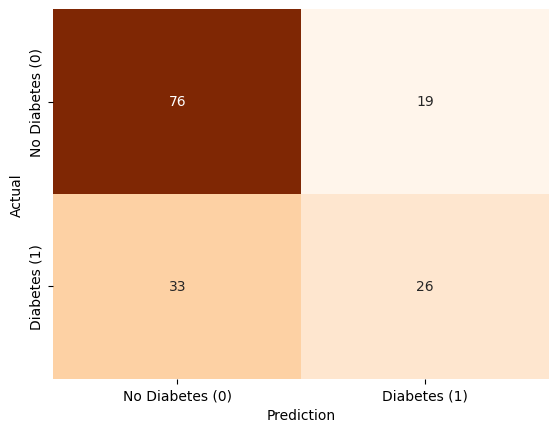

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pred_test=mlp.predict(X_test)

pred=[]

for i in pred_test:
  if(i>=0.5):
    pred.append(1)
  else:
    pred.append(0)

cm=confusion_matrix(y_test,pred)

#sen=TP/TP+FN  spe TN/(TN+FP)

print(cm)

print("Recall:",cm[1][1]/(cm[1][1]+cm[1][0]))
print("Specificity:",cm[0][0]/(cm[0][0]+cm[0][1]))

print(recall_score(y_test,pred))

ax=sns.heatmap(cm,annot=True,xticklabels=["No Diabetes (0)","Diabetes (1)"],yticklabels=["No Diabetes (0)","Diabetes (1)"],cbar=False,cmap="Oranges")
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
plt.show()



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


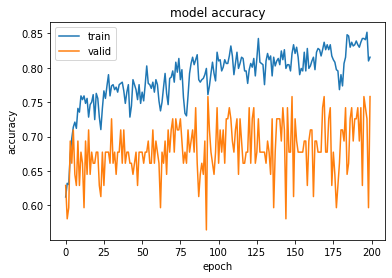

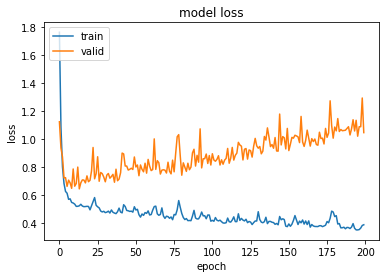

In [ ]:
import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()